In [1]:
import numpy as np
import pandas as pd
import sklearn
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [2]:
data = pd.read_csv("Amazon_Reviews.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
data.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
data.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [6]:
data['Score'].value_counts()

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

In [7]:
data.drop(columns=['Summary'],inplace=True)

In [8]:
def convert_to_sentiment(score):
    if score == 3:
        return "Neutral"
    elif score >= 4:
        return "Positive"
    else:
        return "Negative"

data['Sentiment']=data['Score'].apply(convert_to_sentiment)

In [9]:
data['Sentiment'].value_counts()

Sentiment
Positive    443777
Negative     82037
Neutral      42640
Name: count, dtype: int64

In [10]:
columns_to_drop=['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Time','Score']

In [11]:
data.drop(columns=columns_to_drop,inplace=True)

In [12]:
data

,Text,Sentiment
0,I have bought several of the Vitality canned d...,Positive
1,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,This is a confection that has been around a fe...,Positive
3,If you are looking for the secret ingredient i...,Negative
4,Great taffy at a great price. There was a wid...,Positive
...,...,...
568449,Great for sesame chicken..this is a good if no...,Positive
568450,I'm disappointed with the flavor. The chocolat...,Negative
568451,"These stars are small, so you can give 10-15 o...",Positive
568452,These are the BEST treats for training and rew...,Positive


<Axes: xlabel='count', ylabel='Sentiment'>

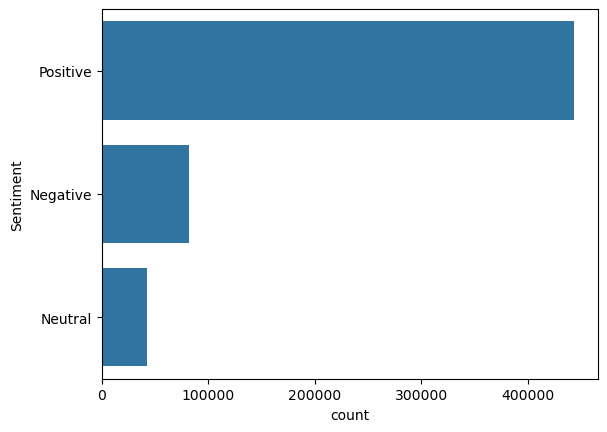

In [13]:
sns.countplot(data=data['Sentiment'])

In [14]:
data['Text']=data['Text'].str.lower()

In [15]:
data

,Text,Sentiment
0,i have bought several of the vitality canned d...,Positive
1,product arrived labeled as jumbo salted peanut...,Negative
2,this is a confection that has been around a fe...,Positive
3,if you are looking for the secret ingredient i...,Negative
4,great taffy at a great price. there was a wid...,Positive
...,...,...
568449,great for sesame chicken..this is a good if no...,Positive
568450,i'm disappointed with the flavor. the chocolat...,Negative
568451,"these stars are small, so you can give 10-15 o...",Positive
568452,these are the best treats for training and rew...,Positive


In [16]:
import re

data['Text'] = data['Text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))


In [17]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
ps=PorterStemmer()
stop_words=stopwords.words('english')
def clean_text(text):
    #Remove non-alphbetic characters
    text=re.sub('[^a-zA-Z]',' ',text)
    #Tokenize  and remove stopwords, apply stemming
    words=[ps.stem(word) for word in text.split() if word  not in stop_words]
    return ' '.join(words)
data['cleaned_text']=data['Text'].apply(clean_text)

In [19]:
data['Text']

0         i have bought several of the vitality canned d...
1         product arrived labeled as jumbo salted peanut...
2         this is a confection that has been around a fe...
3         if you are looking for the secret ingredient i...
4         great taffy at a great price  there was a wide...
                                ...                        
568449    great for sesame chickenthis is a good if not ...
568450    im disappointed with the flavor the chocolate ...
568451    these stars are small so you can give 1015 of ...
568452    these are the best treats for training and rew...
568453    i am very satisfied product is as advertised i...
Name: Text, Length: 568454, dtype: object

In [20]:
#Vectorization(TF-IDF with N-Grams)
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X=tfidf.fit_transform(data['cleaned_text'])
y=data['Sentiment']

In [21]:
X = X.astype(np.float32)

In [22]:
#Split the dataset in train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)

In [23]:
from sklearn.linear_model import  LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model=LogisticRegression(max_iter=200, class_weight='balanced', solver='saga', random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print("Accuracy Score: ",accuracy_score(y_test, y_pred))
print("Classification report: ",classification_report(y_test, y_pred))
print("Confusion matrix: ",confusion_matrix(y_test, y_pred))

C:\Data Science\New folder\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy Score:  0.6975310270821788
Classification report:                precision    recall  f1-score   support

    Negative       0.50      0.70      0.59     16407
     Neutral       0.19      0.59      0.29      8528
    Positive       0.97      0.71      0.82     88756

    accuracy                           0.70    113691
   macro avg       0.56      0.67      0.57    113691
weighted avg       0.84      0.70      0.74    113691

Confusion matrix:  [[11565  3939   903]
 [ 2378  5045  1105]
 [ 9047 17016 62693]]


In [24]:
#well, 69% accuracy  is a good basline with Logistic Regression
#Let's compare this with LinearSVC, as it's a perfect chice for TF-IDF text data and imalanced classes.

from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)
svc_model = LinearSVC(class_weight='balanced',random_state=42,max_iter=5000)
svc_model.fit(X_train,y_train_enc)
y_pred_svc = svc_model.predict(X_test)
print("svc_accuracy: ",accuracy_score(y_test_enc,y_pred_svc))
print("Classification Report: ",classification_report(y_test_enc,y_pred_svc,target_names=le.classes_))

svc_accuracy:  0.8385536234178607
Classification Report:                precision    recall  f1-score   support

    Negative       0.64      0.72      0.68     16407
     Neutral       0.35      0.38      0.36      8528
    Positive       0.93      0.90      0.92     88756

    accuracy                           0.84    113691
   macro avg       0.64      0.67      0.65    113691
weighted avg       0.85      0.84      0.84    113691



In [25]:
#well, 83% accuracy is not bad let's see if it's not underfiitted or overfitted by comparing the test accuracy with the train accuracy
y_train_pred=svc_model.predict(X_train)
train_accuracy=accuracy_score(y_train_pred,y_train_pred)
print("Training accuracy: ",train_accuracy)

Training accuracy:  1.0


In [26]:
#it seems like it's overfitting, let use hyperparameter tuning.
from sklearn.model_selection import GridSearchCV
parameter_grid = {'C':[0.01,0.1,1,10],
                 'loss':['squared_hinge'],
                 'class_weight':['balanced'],
                 'max_iter':[3000,5000]}
grid = GridSearchCV(LinearSVC(), parameter_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X_train,y_train_enc)

print("Best Parameters: ",grid.best_params_)
print("Best CV Score: ",grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters:  {'C': 0.01, 'class_weight': 'balanced', 'loss': 'squared_hinge', 'max_iter': 3000}
Best CV Score:  0.8410600680887024


In [27]:
train_pred_gsv = grid.best_estimator_.predict(X_train)
train_accuracy_gsv = accuracy_score(y_train_enc, train_pred_gsv)
print("Training accuracy: ", train_accuracy_gsv)

Training accuracy:  0.8431798541218173


##Perfect now the training accuracy is 0.843 and Test accuracy is 0.841, This is what we call a well generalized model.